In [1]:
import os, shutil

In [1]:
original_dataset_dir = 'C:/Users/botagoz.mukatova/Downloads/lmn_original_data'

In [2]:
base_dir = 'C:/Users/botagoz.mukatova/Downloads/threeclasses'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_clean_dir = os.path.join(train_dir, 'clean')
os.mkdir(train_clean_dir)

train_snow_dir = os.path.join(train_dir, 'snow')
os.mkdir(train_snow_dir)

train_water_dir = os.path.join(train_dir, 'water')
os.mkdir(train_water_dir)

validation_clean_dir = os.path.join(validation_dir, 'clean')
os.mkdir(validation_clean_dir)

validation_snow_dir = os.path.join(validation_dir, 'snow')
os.mkdir(validation_snow_dir)

validation_water_dir = os.path.join(validation_dir, 'water')
os.mkdir(validation_water_dir)

test_clean_dir = os.path.join(validation_dir, 'clean')
os.mkdir(validation_clean_dir)

test_snow_dir = os.path.join(validation_dir, 'snow')
os.mkdir(validation_snow_dir)

test_water_dir = os.path.join(validation_dir, 'water')
os.mkdir(validation_water_dir)

src = 'C:/Users/botagoz.mukatova/Downloads/lmn_original_data/Train/clean'
shutil.copyfile(src, train_clean_dir)

src = 'C:/Users/botagoz.mukatova/Downloads/lmn_original_data/Train/clean'
shutil.copyfile(src, validation_clean_dir)

src = 'C:/Users/botagoz.mukatova/Downloads/lmn_original_data/Train/clean'
shutil.copyfile(src, test_clean_dir)

src = 'C:/Users/botagoz.mukatova/Downloads/lmn_original_data/Train/snow'
shutil.copyfile(src, train_snow_dir)

src = 'C:/Users/botagoz.mukatova/Downloads/lmn_original_data/Train/snow'
shutil.copyfile(src, validation_snow_dir)

src = 'C:/Users/botagoz.mukatova/Downloads/lmn_original_data/Train/snow'
shutil.copyfile(src, test_snow_dir)

src = 'C:\Users\botagoz.mukatova\Downloads\lmn_original_data\Train\water'

shutil.copyfile(src, train_water_dir)

src = 'C:\Users\botagoz.mukatova\Downloads\lmn_original_data\Train\water'
shutil.copyfile(src, validation_water_dir)

src = 'C:\Users\botagoz.mukatova\Downloads\lmn_original_data\Train\water'
shutil.copyfile(src, test_water_dir)

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-2-a0ea66e0f771>, line 40)

In [2]:
print(os.listdir('C:/Users/botagoz.mukatova/Downloads/lmn_original_data2/Train'))

['clean', 'snow', 'water']


In [1]:
# Ignore  the warnings
#import warnings
#warnings.filterwarnings('always')
#warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#configure
# set matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid', color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [2]:
# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
#from PIL import Image

In [3]:
import tensorflow as tf
#import random as rn

In [4]:
# specifically for cnn
from keras.layers import Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

Using TensorFlow backend.


In [5]:
from keras.utils import to_categorical

In [6]:
from keras.models import Sequential

In [7]:
#Preparing the data
#Making the functions to get the training and validation set from the Images

In [8]:
X = []
Z = []
T = []
L = []
IMG_SIZE = 64
CLEAN_DIR = '/Users/botamukatova/Downloads/lmn/train/clean'
SNOW_DIR = '/Users/botamukatova/Downloads/lmn/train/snow'
WATER_DIR = '/Users/botamukatova/Downloads/lmn/train/water'
CLEAN_TEST_DIR = '/Users/botamukatova/Downloads/lmn/validation/clean'
SNOW_TEST_DIR = '/Users/botamukatova/Downloads/lmn/validation/snow'
WATER_TEST_DIR = '/Users/botamukatova/Downloads/lmn/validation/water'

In [9]:
def assign_label(img, dirt_type):
    return dirt_type

In [10]:
def make_train_data(dirt_type, DIR):
    for img in tqdm(os.listdir(DIR)):
        label = assign_label(img, dirt_type)
        path = os.path.join(DIR, img)
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [11]:
def make_test_data(dirt_type, DIR):
    for img in tqdm(os.listdir(DIR)):
        label = assign_label(img, dirt_type)
        path = os.path.join(DIR, img)
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        
        T.append(np.array(img))
        L.append(str(label))

In [12]:
make_train_data('Clean', CLEAN_DIR)
print(len(X))

100%|██████████| 100/100 [00:00<00:00, 829.95it/s]

100


In [13]:
make_train_data('Snow', SNOW_DIR)
print(len(X))

100%|██████████| 60/60 [00:00<00:00, 912.23it/s]

160


In [14]:
make_train_data('Water', WATER_DIR)
print(len(X))

100%|██████████| 60/60 [00:00<00:00, 870.94it/s]

220


In [15]:
make_test_data('Clean', CLEAN_TEST_DIR)
print(len(T))

100%|██████████| 50/50 [00:00<00:00, 762.72it/s]

50


In [16]:
make_test_data('Snow', SNOW_TEST_DIR)
print(len(T))

100%|██████████| 25/25 [00:00<00:00, 720.46it/s]

75


In [17]:
make_test_data('Water', WATER_TEST_DIR)
print(len(T))

100%|██████████| 25/25 [00:00<00:00, 768.67it/s]

100


In [18]:
#Visualizing some Random images

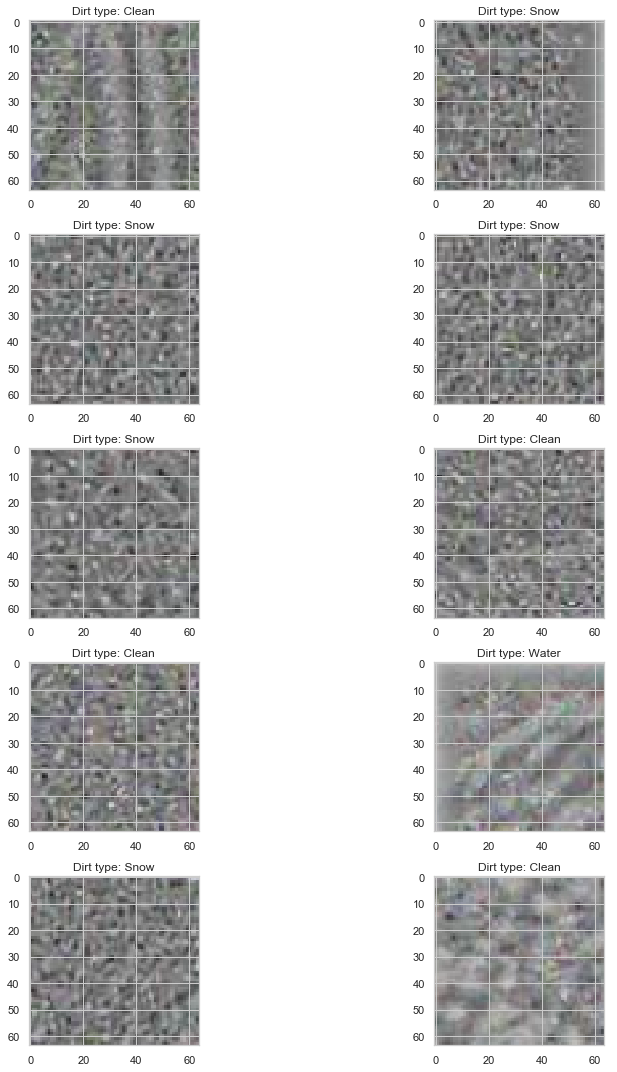

In [59]:
fig, ax = plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range(2):
        l = np.random.randint(0, len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Dirt type: '+Z[l])
        
plt.tight_layout()

In [60]:
#Label Encoding the Y array (i.e. Daisy->0, Rose->1 etc...) & then One Hot Encoding

In [19]:
le = LabelEncoder()
Y = le.fit_transform(Z)
Y = to_categorical(Y,3)
X = np.array(X)
X = X/255

In [20]:
le = LabelEncoder()
V = le.fit_transform(L)
V = to_categorical(V,3)
T = np.array(T)
T = T/255

In [21]:
x_train = X

In [22]:
y_train = Y

In [23]:
x_test = T

In [24]:
y_test = V

In [70]:
x_test

array([[[[0.52156863, 0.50588235, 0.52941176],
         [0.56078431, 0.54117647, 0.57647059],
         [0.57254902, 0.55686275, 0.58039216],
         ...,
         [0.54901961, 0.49411765, 0.5372549 ],
         [0.64705882, 0.58039216, 0.61568627],
         [0.69803922, 0.6627451 , 0.6745098 ]],

        [[0.56862745, 0.55294118, 0.57647059],
         [0.58823529, 0.56862745, 0.60392157],
         [0.57254902, 0.55686275, 0.58039216],
         ...,
         [0.56862745, 0.51372549, 0.55686275],
         [0.65882353, 0.6       , 0.63137255],
         [0.76862745, 0.73333333, 0.74509804]],

        [[0.5372549 , 0.52156863, 0.54509804],
         [0.60784314, 0.58823529, 0.62352941],
         [0.61568627, 0.6       , 0.62352941],
         ...,
         [0.60784314, 0.55686275, 0.58823529],
         [0.72156863, 0.6627451 , 0.69411765],
         [0.83529412, 0.8       , 0.81176471]],

        ...,

        [[0.57647059, 0.55686275, 0.56078431],
         [0.50588235, 0.49019608, 0.48627451]

In [71]:
y_test

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [72]:
#Setting the Random Seeds

In [25]:
np.random.seed(42)
np.random.seed(42)
tf.set_random_seed(42)

In [26]:
#Modelling

In [27]:
#Building the convNet Model

In [28]:
from keras import models
from keras import layers

In [29]:
from keras.layers import Activation, Dense

In [30]:
# Modelling starts using a CNN

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5), 
                 padding = 'Same',activation ='relu', 
                 input_shape = (64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),
                 padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),
                 padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),
                 padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(3, activation = "softmax"))

In [31]:
#Using a LR Annealer

In [43]:
batch_size=32
epochs=5

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [33]:
#Data Augmentation to prevent Overfitting

In [44]:
from keras.preprocessing.image import ImageDataGenerator

In [45]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [46]:
#Compiling the Keras Model and Summary

In [47]:
from keras.optimizers import Adam

In [48]:
model.compile(optimizer=Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [53]:
# model 2
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [54]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 96)        55392     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 96)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 96)          83040     
__________

In [50]:
#Fitting on the Training set and making predcitons on the Validation set¶

In [55]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test), verbose = 1, 
                              steps_per_epoch=x_train.shape[0])

Epoch 1/5
220/220 [==============================] - 97s 443ms/step - loss: 1.0645 - acc: 0.4550 - val_loss: 1.0439 - val_acc: 0.5000
Epoch 2/5
220/220 [==============================] - 91s 412ms/step - loss: 1.0645 - acc: 0.4547 - val_loss: 1.0440 - val_acc: 0.5000
Epoch 3/5
220/220 [==============================] - 6633s 30s/step - loss: 1.0647 - acc: 0.4542 - val_loss: 1.0443 - val_acc: 0.5000
Epoch 4/5
220/220 [==============================] - 102s 463ms/step - loss: 1.0646 - acc: 0.4545 - val_loss: 1.0450 - val_acc: 0.5000
Epoch 5/5
220/220 [==============================] - 91s 413ms/step - loss: 1.0703 - acc: 0.4546 - val_loss: 1.0446 - val_acc: 0.5000


In [1]:
len(y_train)

NameError: name 'y_train' is not defined

In [103]:
len(x_train)

100

In [104]:
len(y_test)

100

In [105]:
len(x_test)

100

In [3]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)